In [1]:
# Read lena.bmp
from skimage import io
lena = io.imread("lena.bmp")
io.imshow(lena)
height = len(lena)
width = len(lena[0])
# io.imsave("lena.bmp", lena)`

In [2]:
from tqdm import tqdm_notebook as tqdm
def blank_image(height, width):
    return np.array([[0 for i in range(width)] for j in range(height)])
def binarize(img, lower_expand, upper_expand, threshold):
    for i in range(height):
        for j in range(width):
            img[i][j] = lower_expand if img[i][j] < threshold else upper_expand
    return img
def dilation(img, kernel):
    print("---dilation start---")
    return_img = blank_image(height, width)
    for i in tqdm(range(height)):
        for j in range(width):
            if(img[i][j] == 255):
                kernel_applied = kernel + [i, j]
                for x, y in kernel_applied:
                    if(x in range(0, height) and y in range(0, width)):
                        return_img[x, y] = 255
    print("---dilation end---")
    return(return_img)
def erosion(img, kernel):
	return_img = blank_image(height, width)
	print("---erosion start---")
	for i in tqdm(range(height)):
		for j in range(width):
			kernel_applied = kernel + [i, j]
			can_be_erosed = True
			for x, y in kernel_applied:
				if(not (x in range(0, height) and y in range(0, width) and img[x][y] == 255)):
					can_be_erosed = False
					break
			if(can_be_erosed):
				return_img[i][j] = 255
	print("---erosion end---")
	return return_img
def hit_and_miss(img, j, k):
    img_erosed_by_j = erosion(img, j)
    img_dilated_by_k = erosion(255 - img, k)
    return_img = blank_image(height, width)
    print("---hit and miss intersecttion start---")
    for i in tqdm(range(height)):
        for j in range(width):
            if(img_erosed_by_j[i, j] == img_dilated_by_k[i, j] and img_erosed_by_j[i, j] == 255):
                return_img[i, j] = 255
    print("---hit and miss intersecttion end---")
    return return_img 
def opening(img, kernel):
    temp = erosion(img, kernel)
    temp = dilation(temp, kernel)
    return temp
def closing(img, kernel):
    temp = dilation(img, kernel)
    temp = erosion(temp, kernel)
    return temp

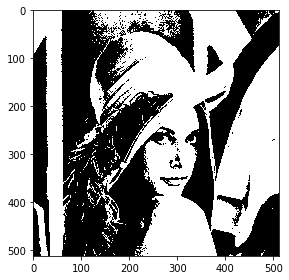

In [3]:
lena = binarize(lena, 0, 255, 128)
io.imshow(lena)

In [4]:
import numpy as np
kernel = np.array([  [0, 0], [0, 1], [0, 2], [0, -1], [0, -2], [1, 0], 
          [1, 1], [1, 2], [1, -1], [1, -2],  [-1, 0], [-1, 1], 
          [-1, 2], [-1, -1], [-1, -2], [2, 0], [2, 1], [2, -1],  
          [-2, 0], [-2, 1], [-2, -1] ])
j = np.array([ [0,0] , [1, 0], [0, -1] ])
k = np.array([ [-1, 1], [0, 1], [-1, 0] ])

In [6]:
temp = dilation(lena, kernel)
io.imsave("dilation.png", temp)

# temp = erosion(lena, kernel)
# io.imsave("erosion.png", temp)

temp = hit_and_miss(lena, j, k)
io.imsave("hit_and_miss.png", temp)

temp = opening(lena, kernel)
io.imsave("opening.png", temp)

temp = closing(lena, kernel)
io.imsave("closing.png", temp)

---dilation start---



---dilation end---
---erosion start---


/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: dilation.png is a low contrast image
  warn('%s is a low contrast image' % fname)



---erosion end---
---erosion start---



---erosion end---
---hit and miss intersecttion start---



---hit and miss intersecttion end---
---erosion start---


/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: hit_and_miss.png is a low contrast image
  warn('%s is a low contrast image' % fname)



---erosion end---
---dilation start---



---dilation end---
---dilation start---


/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: opening.png is a low contrast image
  warn('%s is a low contrast image' % fname)



---dilation end---
---erosion start---



---erosion end---


/usr/local/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: closing.png is a low contrast image
  warn('%s is a low contrast image' % fname)
